In [28]:
f = open('./preprocess/bilinear.txt','r')
text_emb = []
for line in f:
    line_text = [ord(i) for i in line]
    while len(line_text) < 80: #padding
        line_text.insert(0,0)
    text_emb.append(line_text)
text_emb[1]
len(text_emb[2])
    
# for lines in f:
#     [ord(i) for i in 'def lmul : A →ₐ[R] (End R A) :=']

80

In [46]:
import os , glob
import utilities.utilities as util
data_path = './matlib'
preprocess_path = './preprocess'

for filename in glob.glob(os.path.join(data_path, '*.lean')):
    util.preprocess(filename, preprocess_path, data_path)

In [1]:
import os , glob
import utilities.utilities as util

In [2]:
### Path #####
data_path = './matlib'
preprocess_path = './preprocess'
text_path = './preprocess/bilinear.txt'


#### Hyper parameter #####
prediction_type = 0 #the type of prediction
num_lines_predict = 10 #the number of lines for prediction

#### Generate txt files #######
for filename in glob.glob(os.path.join(data_path, '*.lean')):
    util.preprocess(filename, preprocess_path, data_path)

#### read txt files as list ######
text = util.list_lines(text_path)
# print('total line', len(text),'text is @@@@@@@@')
# for j in text:
#     print(j)

#### evaluate the accuracy #####
print('accuracy =', util.evaluate(text, prediction_type, num_lines_predict))
  
test01 = util.encode_text_line(text)
print(len(test01[0]))

accuracy = 0.0
102


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(102*10, 2048)
        self.fc2 = nn.Linear(2048, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 102)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        
        return x
net = Net()
print(net)
    

Net(
  (fc1): Linear(in_features=1020, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=256, bias=True)
  (fc4): Linear(in_features=256, out_features=102, bias=True)
)


In [12]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001)
data_path = './matlib'
preprocess_path = './preprocess'

EPOCHS = 1
num_lines_predict = 10

for epoch in range(EPOCHS):
    l=0
    loss=0
    for filename in glob.glob(os.path.join(preprocess_path, '*.txt')): 
        text = util.list_lines(filename)
        en_text = util.encode_text_line(text)
        if l < 5:
            for i in range(len(text)-num_lines_predict-1):
                if l < 5:
                    #choose 
                    X = en_text[i:i+num_lines_predict]
                    y = en_text[i+num_lines_predict]
                    # X = []
                    # for i in chosen:
                    #     X += i
                    X = torch.FloatTensor(X)
                    y = torch.FloatTensor(y)
                    net.zero_grad()
                    output = net(X.view(-1, 102*num_lines_predict))
                    # print(y.size())
                    # print(X.view(-1,80*num_lines_predict))
                    loss = F.mse_loss(output, y)
                    loss.backward()
                    optimizer.step()
                    
            l+=1
            print(loss)

0


<ipython-input-12-d059cf8c70ee>:31: UserWarning: Using a target size (torch.Size([102])) that is different to the input size (torch.Size([1, 102])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  loss = F.mse_loss(output, y)


tensor(1024.0367, grad_fn=<MseLossBackward0>)
tensor(4445.4863, grad_fn=<MseLossBackward0>)
tensor(3842.2334, grad_fn=<MseLossBackward0>)
tensor(123205.8438, grad_fn=<MseLossBackward0>)


In [15]:
loss

tensor(123205.8438, grad_fn=<MseLossBackward0>)

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import utilities.utilities as util
num_lines_predict = 10
net = torch.load("./runs/08-08-2022-2048-1024-512-256/epoch-225.pth")
test = util.list_lines("./preprocess/algebra-associated.txt")
en_test = util.encode_text_line(test)
# X = en_test[2:2+num_lines_predict]
# X = torch.FloatTensor(X)
# print(X.view(-1,102*num_lines_predict).tolist())
prediction = net(X.view(-1,102*num_lines_predict))
# print(prediction.size(),'\n',prediction)
prediction, numbertext = util.decode_text_line(prediction.tolist())
# prediction =  prediction.tolist()
for i in range(len(en_test)-num_lines_predict):
    X = en_test[i:i+num_lines_predict]
    ans = en_test[i+num_lines_predict]
    X = torch.FloatTensor(X)
    prediction = net(X.view(-1,102*num_lines_predict))
    prediction, numbertext = util.decode_text_line(prediction.tolist())
    expected, numbertext2 = util.decode_text_line([ans])
    print('expected answer \n', expected ,'\nprediction \n',prediction)

expected answer 
 ['variables {p : α} (hp : prime p)\n'] 
prediction 
 ["\x08\x00\x00\x00\x0f\x00\x00\x00\x00\x06\x07\x0e\x14\x00\x00\x0b\x07\x03\x06\x01\x03\x00\x00\x07\x00\x00\x04\x00\x01\x00\x00\x05\n\x00\x00\x00\x0f\x0e\x04\x00\x00\x08¨\x07\x00\x07\x10\r\x08\t\x1f\x00\x08\x1d\x11\x1b\x16'\x14\x1f\x08?2#\x17\x1b5?=2,B\x1eÅ!-iØ\x1f.'õA\x00\x11\x0c\x1f\x00\x00-ø\x00&H.\x00\x00\x00\x1a"]
expected answer 
 ['include hp\n'] 
prediction 
 ['\x01\x00\x01\x01\x01\x02\x01\x00\x01\x02\x01\x02\x01\x01\x03\x03\x03\x03\x03\x04\x05\x00\x03\x03\x03\x00\x05\x03\x03\x03\x06\x08\x05\x05\x04\x03\x06\x04\x04\x06\x04\x03\x0b\x07\x06\x0c\t\x08\t\x06\x08\x06\x07\x06\x06\t\t\x07\x07\t\x0c\x05\x08\n\n\x0b\n\t\x0b\n\r\x0c\n\r\n\x0e\x0b\r\x0b\n\x0e\x11\x0f\x0e\r\n\x0f\r\r\x0e\x11\x0f\x0e\x11\x0f\x06']
expected answer 
 ['lemma ne_zero : p ≠ 0 :=\n'] 
prediction 
 ['\x06\x00\x04\x0b\x00\x08\x14\x1b\r\x1b\x12\x00\x0cà\x0c+\x0c\x1d\x1c"\x0f\r+\x0b(\x17\x14BD*\x1b0\x14\x19\x1a <)K\x1d\x00%#\x8d\\1\x1eR\x00³ė-\x1f

In [10]:
len(en_test)

729

In [134]:
input = torch.randn(3, 5, requires_grad=True)
target = torch.tensor([1, 0, 4])
output = F.nll_loss(F.log_softmax(input), target)
output.backward()

<ipython-input-134-afb3cde887cf>:3: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.nll_loss(F.log_softmax(input), target)


In [127]:
input

tensor([[ 0.8206,  0.3732,  0.7117, -0.7908,  0.3385],
        [ 1.1699, -0.0723, -0.0484, -0.9167,  1.9843],
        [ 1.0320, -1.5377,  0.5465,  0.5768, -0.5105]], requires_grad=True)

In [24]:
import math
math.log(max(max(test01)),2)

13.237209960755022

In [26]:
pow(2,13.237209960755022)

9656.000000000005

In [27]:
chr(9656)

'▸'

In [35]:
maxi = 0
for filename in glob.glob(os.path.join(preprocess_path, '*.txt')):
    text = util.list_lines(filename)
    test01 = util.encode_text_line(text)
    newmax =  max(max(test01))
    if newmax >= maxi:
        maxi = newmax
        k = filename


In [6]:
maxi = 0
for filename in glob.glob(os.path.join(preprocess_path, '*.txt')):
    text = util.list_lines(filename)
    test01 = util.encode_text_line(text)
    j=0
    for line in test01:
        j+=1
        if len(line) >= maxi:
            maxi = len(line)
            k = filename
            l = j
            m = text[j]


In [7]:
k

'./preprocess/field_power.txt'

In [8]:
maxi

101

In [10]:
j

128

In [11]:
len('@[simp] lemma zpow_le_iff_le (hx : 1 < x) : x ^ m ≤ x ^ n ↔ m ≤ n := (zpow_strict_mono hx).le_iff_le')

100

In [ ]:
for i in range(len(text)-num_lines_predict-1):
    lines = text[i:i+num_lines_predict]
    # print(total,'th comparation between ',predict(lines, prediction_type), 'and',text[i+num_lines_predict] )
    if predict(lines, prediction_type) == text[i+num_lines_predict]:
        correct +=1

In [54]:
lists = [[1,3,5],[2,5,6],[7,8,9]]
newlist = []
for i in lists:
    newlist += i
newlist

[1, 3, 5, 2, 5, 6, 7, 8, 9]

In [53]:
newlist

[1, 3, 5, 2, 5, 6, 7, 8, 9]

In [48]:
lists[0]+lists[1]

[1, 3, 5, 2, 5, 6]

In [13]:
k = ['w','w','x']

In [14]:
k

['w', 'w', 'x']

In [15]:
k.remove('w')

In [16]:
k

['w', 'x']

In [1]:
test = util.list_lines("./preprocess/bilinear.txt")
en_test = util.encode_text_line(test)
de_test = util.decode_text_line(en_test)
test == de_test

NameError: name 'util' is not defined

In [13]:
p = os.walk('./matlib')
[x[0] for x in p]

['./matlib',
 './matlib/data',
 './matlib/data/bool',
 './matlib/data/dfinsupp',
 './matlib/data/vector',
 './matlib/data/polynomial',
 './matlib/data/polynomial/degree',
 './matlib/data/lazy_list',
 './matlib/data/string',
 './matlib/data/option',
 './matlib/data/sym',
 './matlib/data/ordmap',
 './matlib/data/zmod',
 './matlib/data/mv_polynomial',
 './matlib/data/setoid',
 './matlib/data/array',
 './matlib/data/rbmap',
 './matlib/data/multiset',
 './matlib/data/qpf',
 './matlib/data/qpf/univariate',
 './matlib/data/qpf/multivariate',
 './matlib/data/qpf/multivariate/constructions',
 './matlib/data/finset',
 './matlib/data/fun_like',
 './matlib/data/pi',
 './matlib/data/set',
 './matlib/data/set/intervals',
 './matlib/data/pnat',
 './matlib/data/set_like',
 './matlib/data/stream',
 './matlib/data/num',
 './matlib/data/fintype',
 './matlib/data/rat',
 './matlib/data/prod',
 './matlib/data/bitvec',
 './matlib/data/finsupp',
 './matlib/data/dlist',
 './matlib/data/sum',
 './matlib/data/ma

In [2]:
import glob, os
import utilities.utilities as util
data_path = './matlib'
preprocess_path = './preprocess'
p = glob.glob(data_path + '/*', recursive = True)
for path in p:
    for filename in glob.glob(os.path.join(path, '*.lean')):
        util.preprocess(filename, preprocess_path, data_path)

In [4]:
p = glob.glob(data_path + '/*', recursive = True)
p[0]

'./matlib/data'

In [3]:
from tqdm import tqdm

In [8]:
from tqdm import tqdm
lst = [1, 3, 5, 7, 11]

for element in tqdm(lst):
    a=[]

100%|██████████| 5/5 [00:00<00:00, 54471.48it/s]


In [23]:
torch.save(net,'./abe.pth')

In [24]:
net2 =  torch.load('./abe.pth')

In [25]:
net == net2

False

In [33]:
net.state_dict()['fc1.weight']

tensor([[-0.0123, -0.0312,  0.0150,  ..., -0.0179,  0.0191,  0.0024],
        [ 0.0076,  0.0264,  0.0127,  ..., -0.0313,  0.0249, -0.0239],
        [-0.0156,  0.0098, -0.0021,  ..., -0.0190, -0.0002, -0.0210],
        ...,
        [ 0.0237, -0.0251,  0.0258,  ..., -0.0249, -0.0149, -0.0072],
        [-0.0114, -0.0127,  0.0229,  ..., -0.0313,  0.0272, -0.0175],
        [ 0.0086,  0.0011,  0.0119,  ..., -0.0083,  0.0119, -0.0307]])

In [34]:
net2.state_dict()['fc1.weight']

tensor([[-0.0123, -0.0312,  0.0150,  ..., -0.0179,  0.0191,  0.0024],
        [ 0.0076,  0.0264,  0.0127,  ..., -0.0313,  0.0249, -0.0239],
        [-0.0156,  0.0098, -0.0021,  ..., -0.0190, -0.0002, -0.0210],
        ...,
        [ 0.0237, -0.0251,  0.0258,  ..., -0.0249, -0.0149, -0.0072],
        [-0.0114, -0.0127,  0.0229,  ..., -0.0313,  0.0272, -0.0175],
        [ 0.0086,  0.0011,  0.0119,  ..., -0.0083,  0.0119, -0.0307]])

In [43]:
from datetime import datetime

now = datetime.now() # current date and time
a=[now.strftime("%m-%m-%Y")]
print(a)

['07-07-2022, 00:27:58']


In [44]:
k=9
str(k)

'9'

In [45]:
score = [1,2,3,4,5]
with open('./neuralnetwork/'+now.strftime("%m-%m-%Y")+'_'+str(k)+".txt", "w") as f:
    for s in score:
        f.write(str(s) +"\n")

In [34]:
loss.item()

123205.84375

In [33]:
'loss' is str

<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-33-6c3030368d97>:1: SyntaxWarning: "is" with a literal. Did you mean "=="?
  'loss' is str


False

In [47]:
from datetime import datetime
now = datetime.now()
loss_list = [2.2,62,99]
k=0
while os.path.exists('./neuralnetwork/'+now.strftime("%m-%m-%Y")+'_'+str(k)+".txt"):
    k+=1
ppp = './neuralnetwork/'+now.strftime("%m-%m-%Y")+'_'+str(k)
with open(ppp+".txt", "w") as f:
    for s in loss_list:
        f.write(str(s) +"\n")

In [48]:
torch.save(net,ppp+'.pth')

In [14]:
import matplotlib.pyplot as plt
import os , glob
import utilities.utilities as util
max_char = 102
preprocess_path = './preprocess'
f = open("./neuralnetwork/fcn07-07-2022_0.txt", "r")
c= f.readlines()
lists = []
# for i in range(10):
#     k += 7417
#     lists.append(float(c[k-1].strip("\n")))
EPOCHS = 10
k=0
for epoch in range(EPOCHS):
    for filename in glob.glob(os.path.join(preprocess_path, '*.txt')): 
        text = util.list_lines(filename)
        en_text = util.encode_text_line(text, max_char)
        for i in range(len(text)-10-1):
            k+=1
        lists.append(float(c[k-1].strip("\n")))
# xpoints = range(10)
# ypoints = lists
# plt.plot(xpoints, ypoints)
lists

[6233.84765625,
 456.6353759765625,
 4134.8369140625,
 3860.010498046875,
 15011.2607421875,
 2703197.5,
 2703197.5,
 1882.25830078125,
 2027132.75,
 18609.166015625,
 1940.5897216796875,
 973.4368286132812,
 2032740.25,
 695.9895629882812,
 2095.995849609375,
 2391.00732421875,
 4465.72314453125,
 4199096.5,
 1267.2913818359375,
 813.6295776367188,
 3010.409912109375,
 715640.5625,
 97592.875,
 1133.55224609375,
 19682.67578125,
 6956.42626953125,
 93706.0390625,
 1684052.375,
 42964.63671875,
 42964.63671875,
 2675.4892578125,
 863.37060546875,
 2188.77978515625,
 8986.111328125,
 4049.521728515625,
 10988.3046875,
 10988.3046875,
 4608.734375,
 1937.241455078125,
 14739.947265625,
 3979.2099609375,
 3979.2099609375,
 13725.6748046875,
 1653.498291015625,
 4785.435546875,
 11548.6689453125,
 1078.3203125,
 1784.417236328125,
 3440.0107421875,
 5164.84619140625,
 6689.0048828125,
 16738.03515625,
 1425.026611328125,
 1368.9578857421875,
 44003.59375,
 10700.6123046875,
 11430.69140625

In [15]:
len(lists)

6300

In [16]:
lists[6299]

6233.84765625

In [17]:
lists[629]

10715.634765625

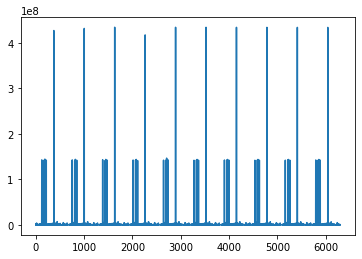

In [18]:
xpoints = range(6300)
ypoints = lists
plt.plot(xpoints, ypoints)

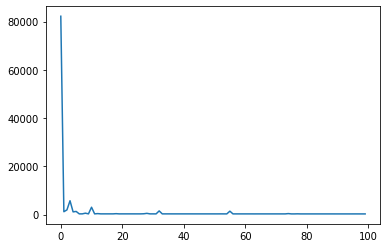

In [3]:
import utilities.utilities as util
util.plot_loss("./neuralnetwork/fcn07-07-2022_0.txt")

In [ ]:
num_lines_predict=10
net = 
test = util.list_lines("./preprocess/algebra-add_torsor.txt")
en_test = util.encode_text_line(test)
X = en_test[0:0+num_lines_predict]
X = torch.FloatTensor(X)
prediction = net(X.view(-1,102*num_lines_predict))
print(prediction)
prediction = [ round(i) if i>=0 else 0 for i in prediction[0].tolist()]
print(prediction)
prediction = [chr(i) for i in prediction]
print(prediction)
pred = ''
for j in prediction:
    pred+=j
pred

In [5]:
oo = ['3\n','4.5']
oo = [float(i.strip('\n')) for i in oo]
oo

[3.0, 4.5]